# transforms2 tutorial 

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from src.utils import rle_decode, mask_as_image
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### load data

In [2]:
df = pd.read_csv('./data/masks.csv')
data_dir = './data/'
ImageId = '0005d01c8.jpg'
img_path = os.path.join(data_dir,ImageId)
img_masks = df.loc[df['ImageId'] == ImageId , 'EncodedPixels'].tolist()

In [3]:
def load_image(img):
    image = np.array(Image.open(img))
    return image

def save_image(img):
    image = Image.fromarray(img, mode='F')
    image.save('mask.jpeg')
    
img = load_image(img_path)
print ('type(img) :',type(img))
print ('img.shape :',img.shape)

mask = mask_as_image(img_masks)
print ('type(mask) ',type(mask))
print ('mask.shape ',mask.shape)

type(img) : <class 'numpy.ndarray'>
img.shape : (768, 768, 3)
type(mask)  <class 'numpy.ndarray'>
mask.shape  (768, 768)


### origin image and mask

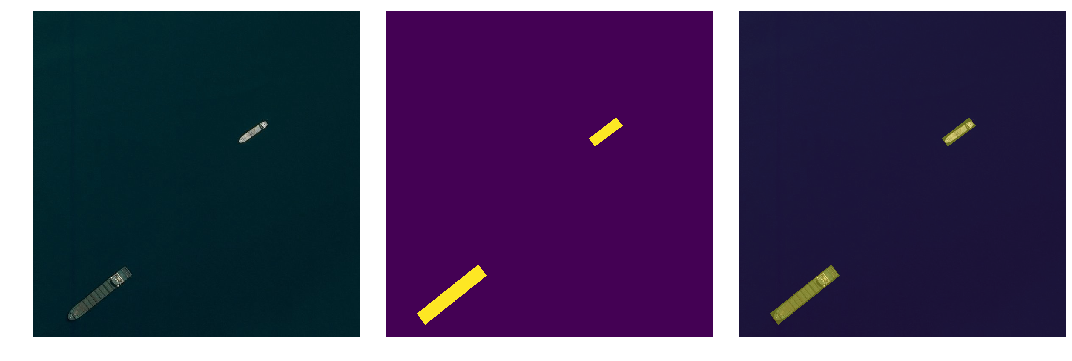

In [4]:
fig, axs = plt.subplots(1,3,figsize=(15,40))
for i in range(3):
    axs[i].axis('off')
axs[0].imshow(img)
axs[1].imshow(mask)
axs[2].imshow(img)
axs[2].imshow(mask,alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

### Resize2

type(img_t) : <class 'numpy.ndarray'>
img_t.shape : (256, 256, 3)

type(mask_t)  <class 'numpy.ndarray'>
mask_t.shape  (256, 256)



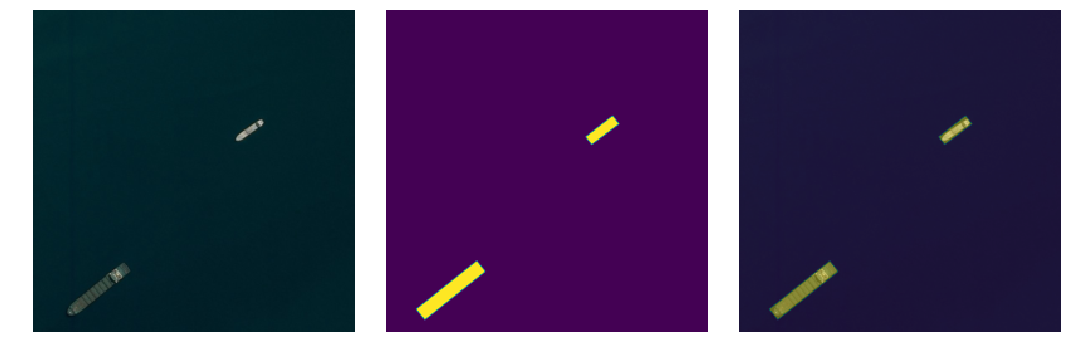

In [5]:
from src.transforms2 import Compose2,Resize2
transforms = Compose2([
    Resize2((256,256))
])

img_t, mask_t = transforms(img,mask)

print ('type(img_t) :',type(img_t))
print ('img_t.shape :',img_t.shape)
print ()
print ('type(mask_t) ',type(mask_t))
print ('mask_t.shape ',mask_t.shape)
print ()

# print (np.max(mask))

fig, axs = plt.subplots(1,3,figsize=(15,40))
for i in range(3):
    axs[i].axis('off')
axs[0].imshow(img_t)
axs[1].imshow(mask_t)
axs[2].imshow(img_t)
axs[2].imshow(mask_t,alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

### Resize2 RandomHorizontalFlip2

type(img_t) : <class 'numpy.ndarray'>
img_t.shape : (256, 256, 3)

type(mask_t)  <class 'numpy.ndarray'>
mask_t.shape  (256, 256)



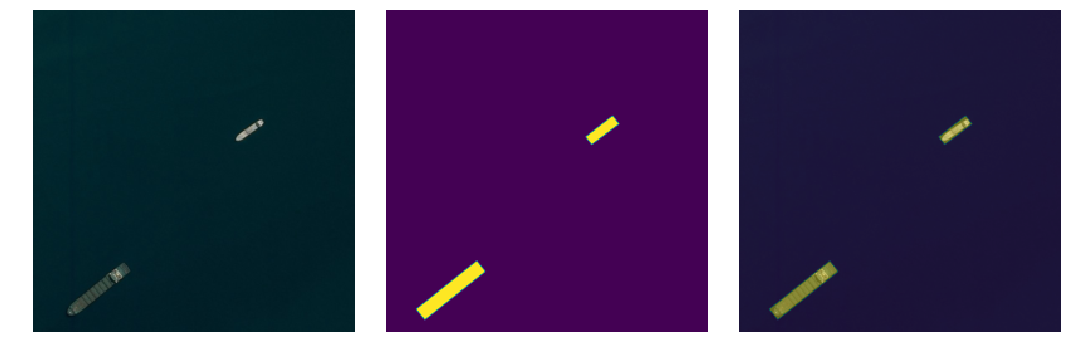

In [6]:
from src.transforms2 import Compose2,Resize2,RandomHorizontalFlip2
transforms = Compose2([
    Resize2((256,256)),
    RandomHorizontalFlip2(),
])

img_t, mask_t = transforms(img, mask)

print ('type(img_t) :',type(img_t))
print ('img_t.shape :',img_t.shape)
print ()
print ('type(mask_t) ',type(mask_t))
print ('mask_t.shape ',mask_t.shape)
print ()


fig, axs = plt.subplots(1,3,figsize=(15,40))
for i in range(3):
    axs[i].axis('off')
axs[0].imshow(img_t)
axs[1].imshow(mask_t)
axs[2].imshow(img_t)
axs[2].imshow(mask_t,alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

### Resize2 RandomVerticalFlip2

type(img_t) : <class 'numpy.ndarray'>
img_t.shape : (256, 256, 3)

type(mask_t)  <class 'numpy.ndarray'>
mask_t.shape  (256, 256)



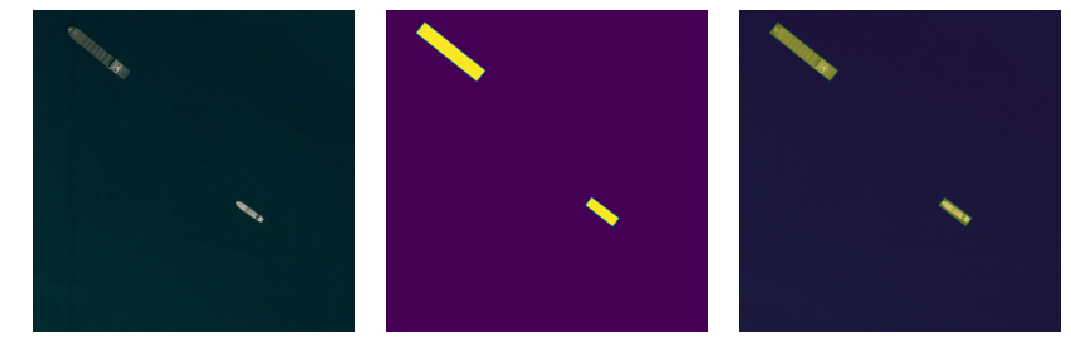

In [7]:
from src.transforms2 import Compose2,Resize2,RandomVerticalFlip2
transforms = Compose2([
    Resize2((256,256)),
    RandomVerticalFlip2(),
])

img_t, mask_t = transforms(img, mask)

print ('type(img_t) :',type(img_t))
print ('img_t.shape :',img_t.shape)
print ()
print ('type(mask_t) ',type(mask_t))
print ('mask_t.shape ',mask_t.shape)
print ()


fig, axs = plt.subplots(1,3,figsize=(15,40))
for i in range(3):
    axs[i].axis('off')
axs[0].imshow(img_t)
axs[1].imshow(mask_t)
axs[2].imshow(img_t)
axs[2].imshow(mask_t,alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

### Resize2 RandomRotation

2
88.64405348408854
type(img_t) : <class 'numpy.ndarray'>
img_t.shape : (256, 256, 3)

type(mask_t)  <class 'numpy.ndarray'>
mask_t.shape  (256, 256)



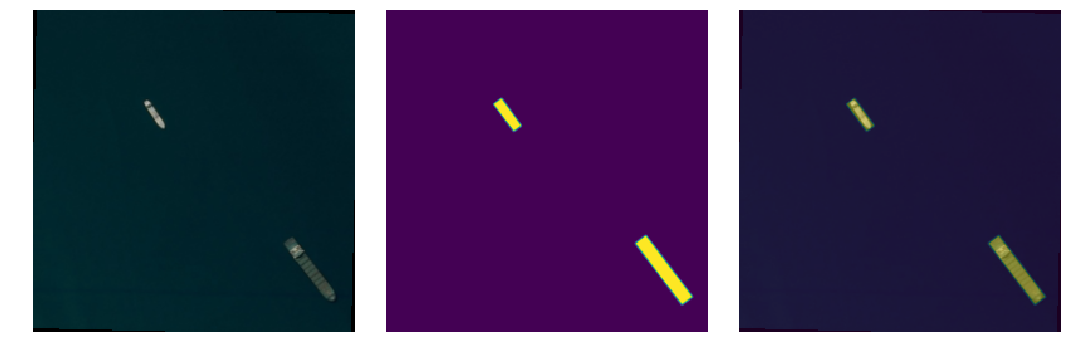

In [15]:
from src.transforms2 import RandomRotation2
transforms = Compose2([
    Resize2((256,256)),
    RandomRotation2(120,resample=Image.BILINEAR),
])

img_t, mask_t = transforms(img, mask)

print ('type(img_t) :',type(img_t))
print ('img_t.shape :',img_t.shape)
print ()
print ('type(mask_t) ',type(mask_t))
print ('mask_t.shape ',mask_t.shape)
print ()

fig, axs = plt.subplots(1,3,figsize=(15,40))
for i in range(3):
    axs[i].axis('off')
axs[0].imshow(img_t)
axs[1].imshow(mask_t)
axs[2].imshow(img_t)
axs[2].imshow(mask_t,alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()